In [1]:
import matplotlib.pyplot as pl
import seaborn as sns
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import norm, skew

%config InlineBackend.figure_format = 'retina'

# General fig dim and colors
fs = (20,10)
pal = 'CMRmap_r'

In [2]:
df = pd.read_csv('D:/dip(AIML(cse))/kaggle/iris_flower.csv').drop('Id', axis=1)
display( df )

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,NaN,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,-1.0,0.2,Iris-setosa
3,4.6,NaN,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [19]:
display( pd.DataFrame(df.Species.value_counts()) )


,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [20]:
df.describe().T.iloc[0:, 1:].style.background_gradient(cmap=pal)

,mean,std,min,25%,50%,75%,max
SepalLengthCm,5.843333,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000
SepalWidthCm,3.054000,0.433594,2.000000,2.800000,3.000000,3.300000,4.400000
PetalLengthCm,3.758667,1.764420,1.000000,1.600000,4.350000,5.100000,6.900000
PetalWidthCm,1.198667,0.763161,0.100000,0.300000,1.300000,1.800000,2.500000


In [21]:
pl.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap=pal)
pl.show()

ValueError: could not convert string to float: 'Iris-setosa'

<Figure size 1000x800 with 0 Axes>

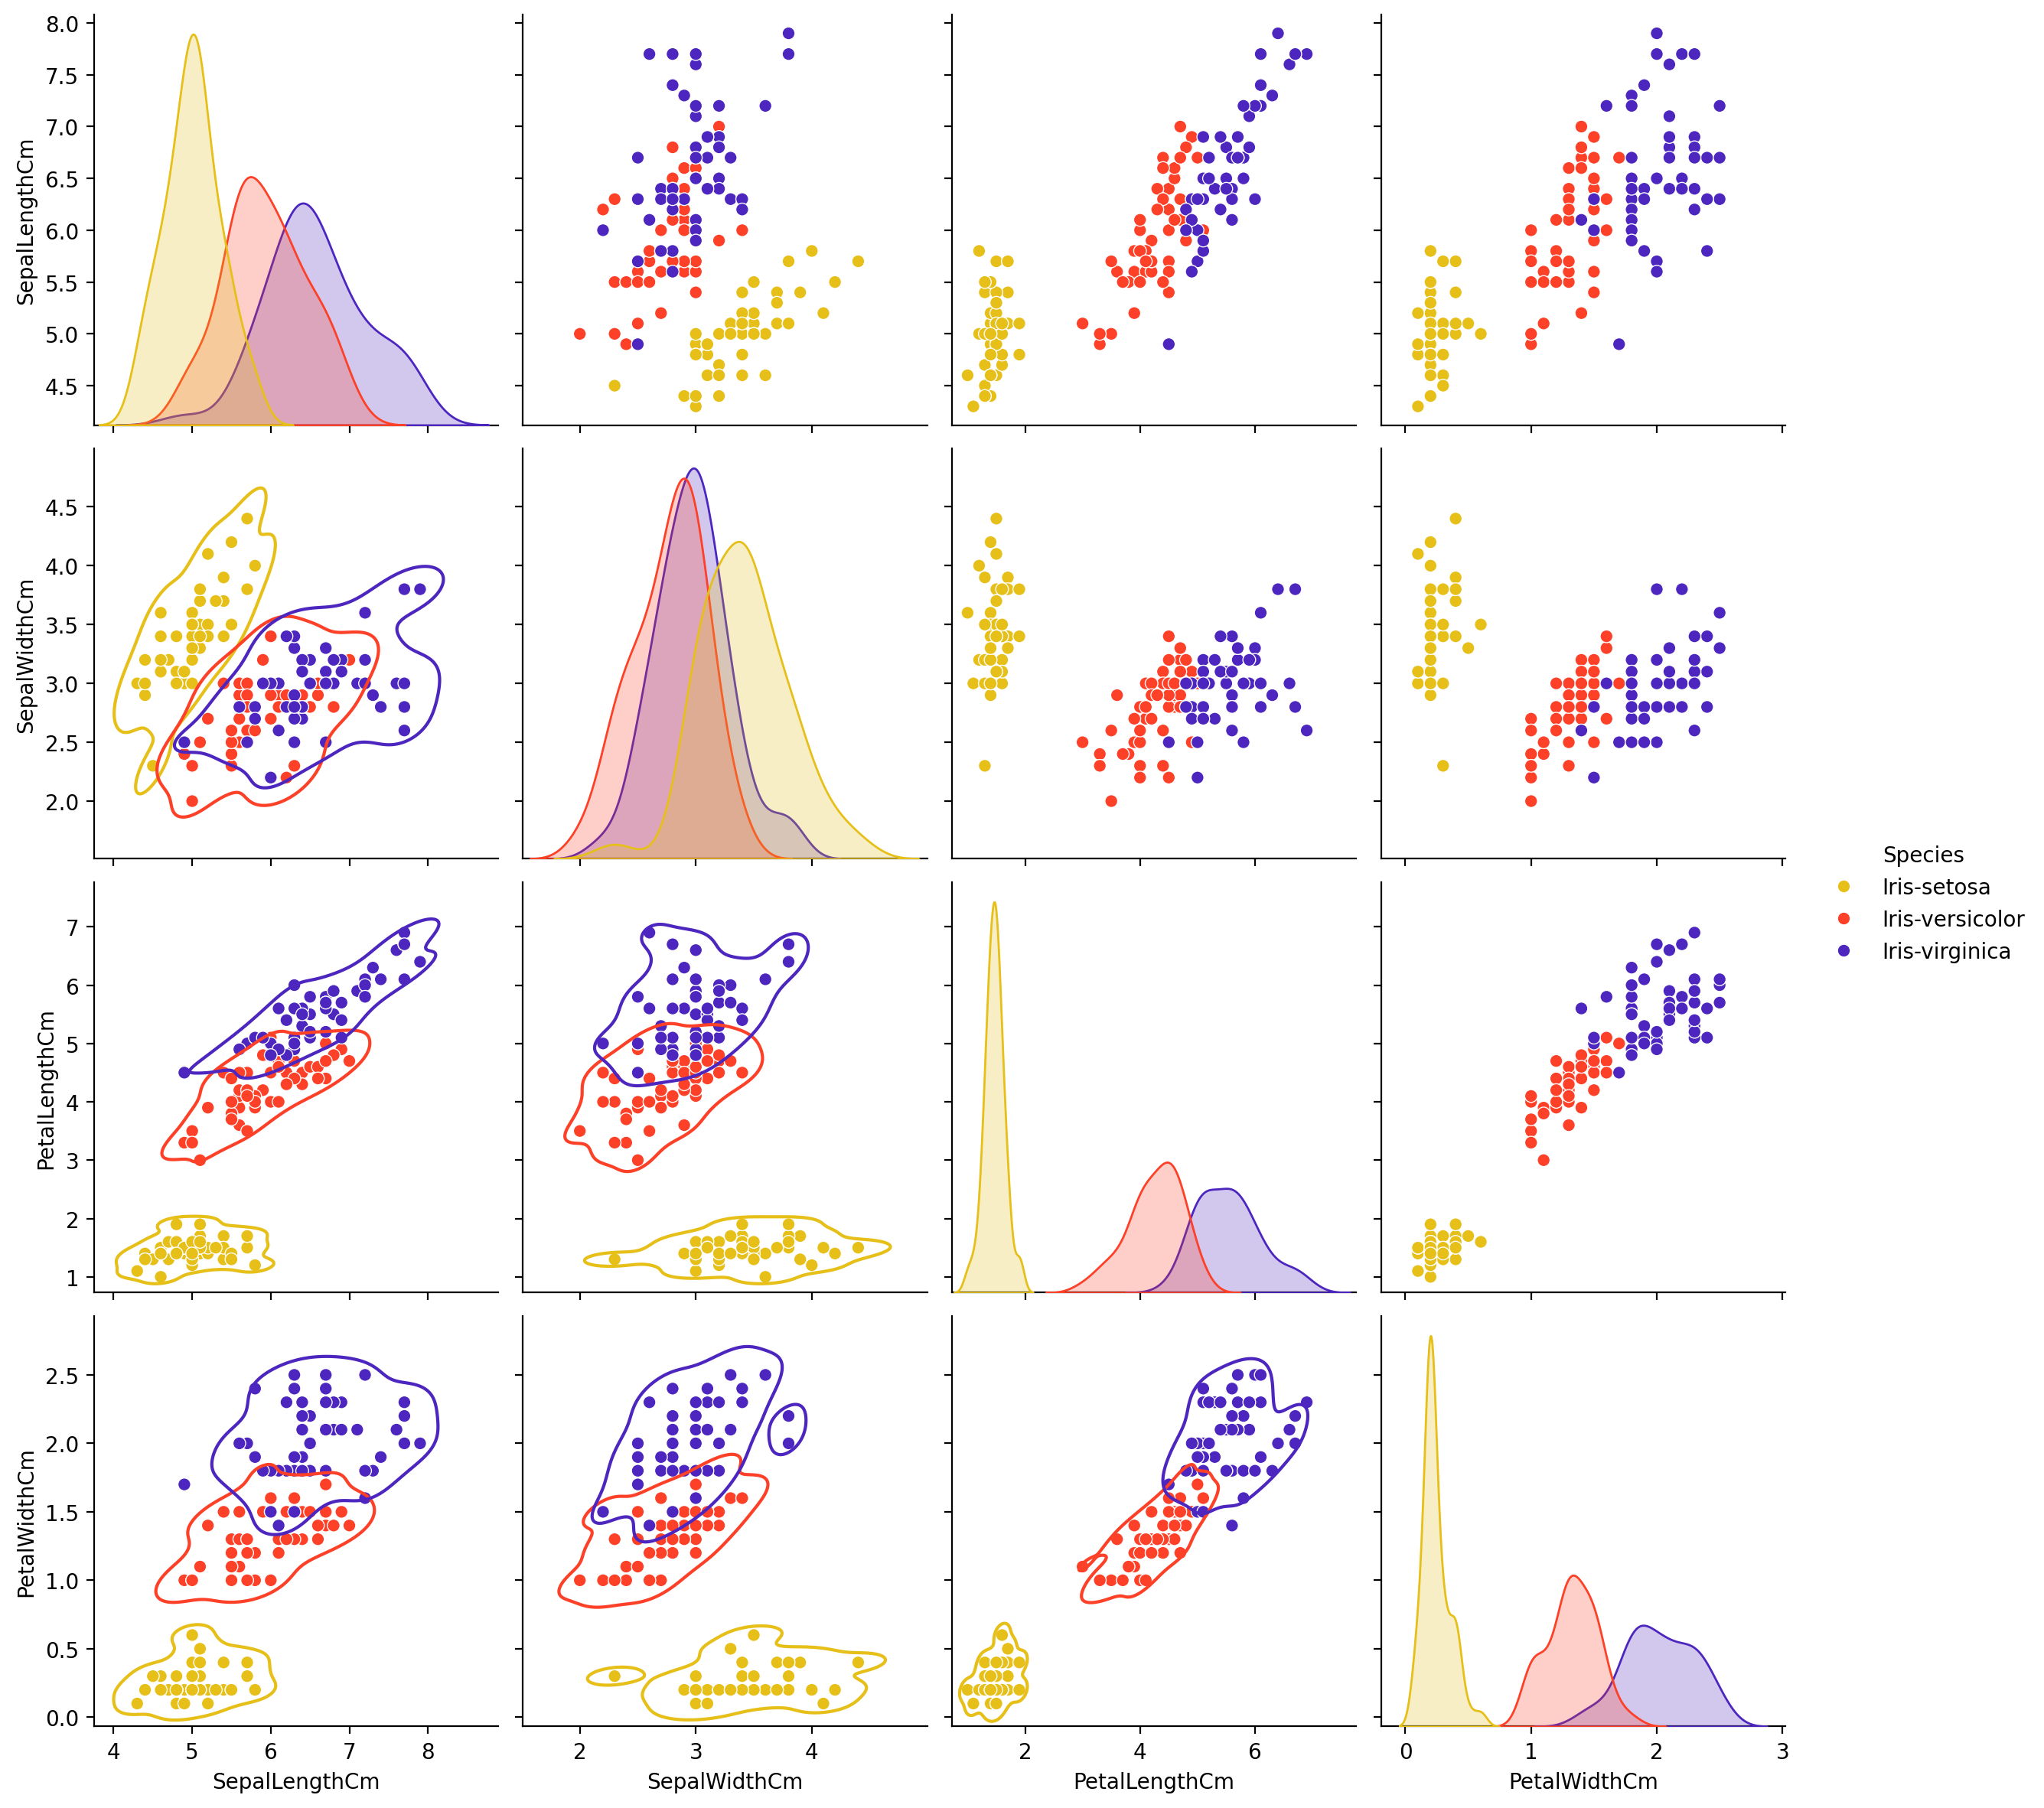

In [22]:
sns.pairplot(df, hue='Species', palette=pal, height=3).map_lower(sns.kdeplot, levels=2)
pl.show()

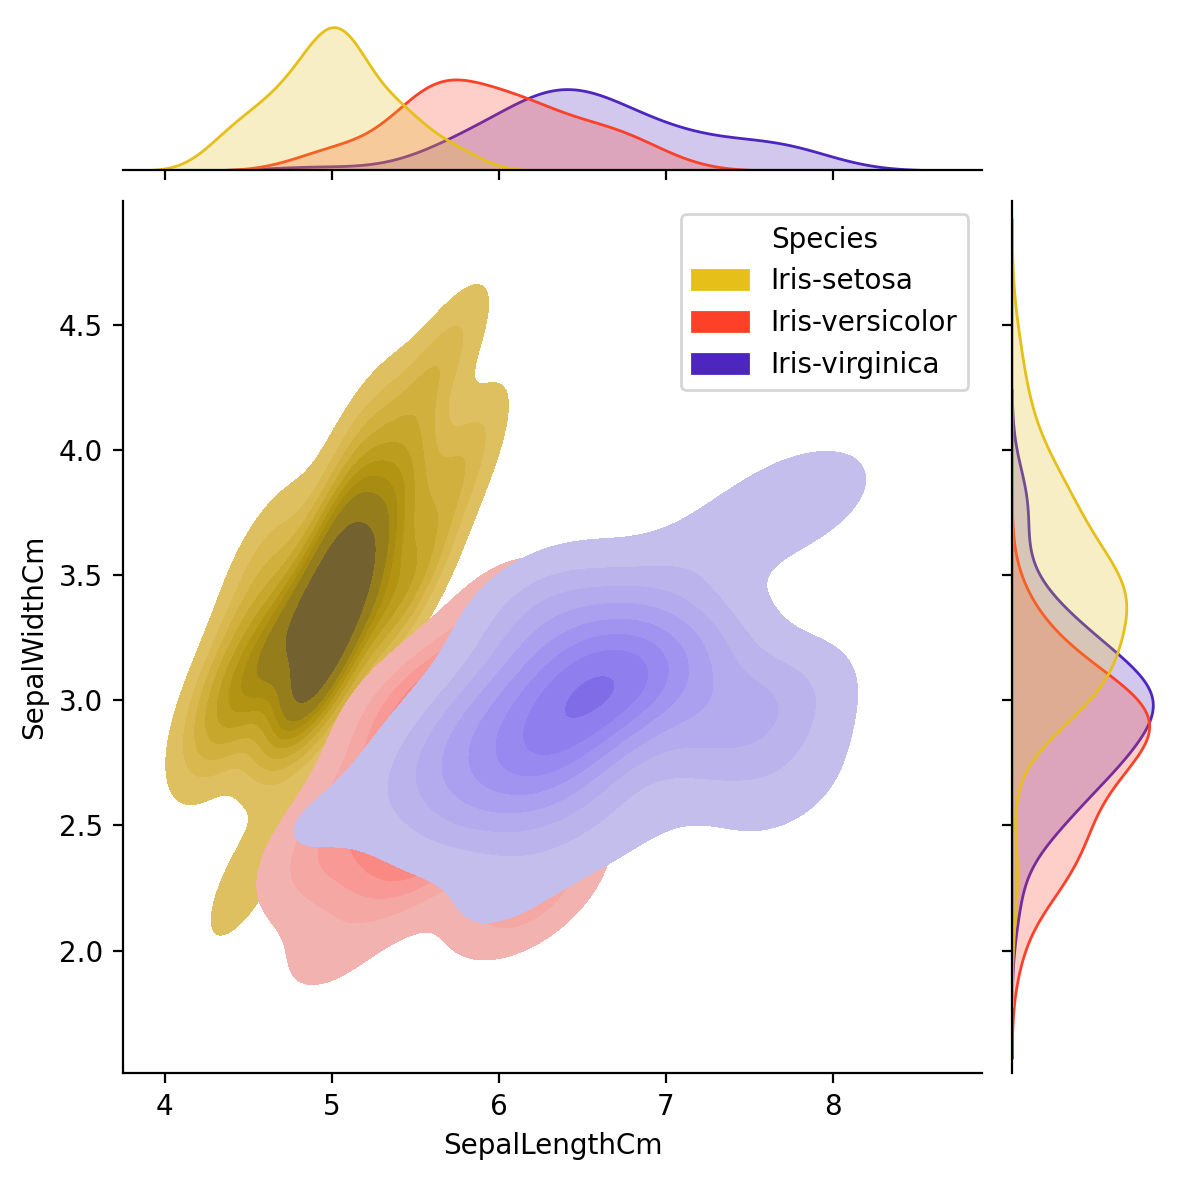

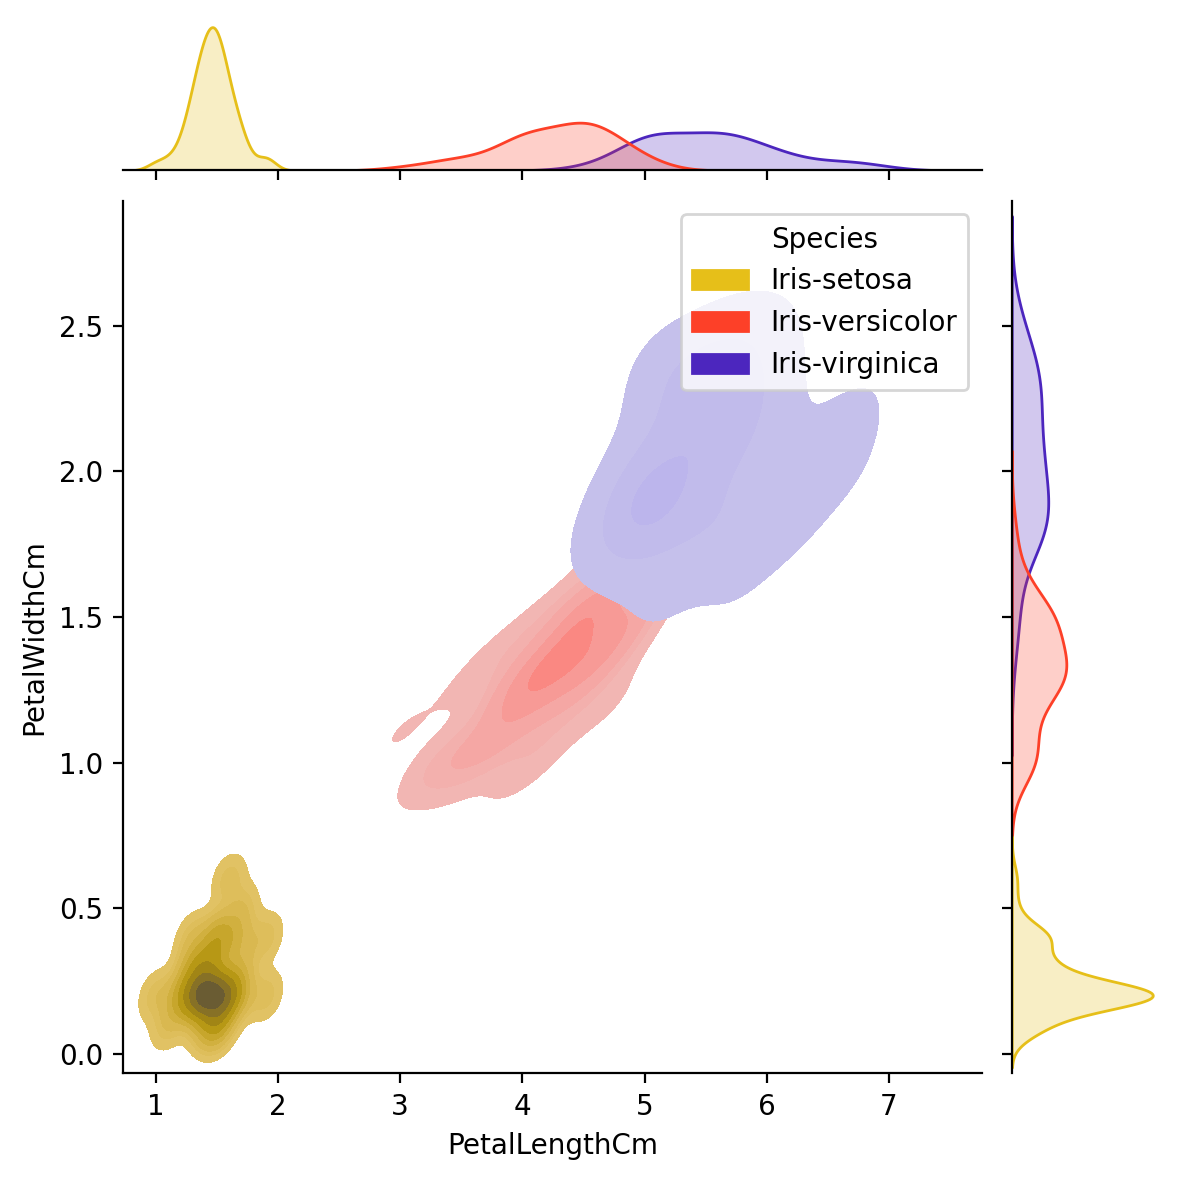

In [23]:
sns.jointplot(x='SepalLengthCm',
              y='SepalWidthCm',
              kind="kde",
              fill=True,
              palette=pal,
              hue='Species',
              data=df)

sns.jointplot(x='PetalLengthCm',
              y='PetalWidthCm',
              kind="kde",
              fill=True,
              palette=pal,
              hue='Species',
              data=df)

pl.show()

In [ ]:
!pip install dataprep

In [ ]:
from dataprep.eda import create_report
create_report(df)

In [ ]:

fig, axes = pl.subplots(2, 4, figsize=fs)

# Violin Plots
for ax, col in zip(axes.flatten(), df.columns[:-1]):
    sns.violinplot(x='Species', y=col, palette=pal, data=df, ax=ax)
    
# Strip Plots
for ax, col in zip(axes.flatten()[4:], df.columns[:-1]):
    sns.stripplot(x='Species', y=col, palette=pal, data=df, ax=ax)
    
pl.tight_layout(pad=0, w_pad=1.5, h_pad=2)
pl.show()

In [ ]:
fig, axes = pl.subplots(2, 4, figsize=fs)

# Categorized Histograms
for ax, col in zip(axes.flatten(), df.columns[:-1]):
    sns.histplot(data=df, x=col, kde=True, bins=25, hue='Species', palette=pal, ax=ax)

# Total Histograms
for ax, col in zip(axes.flatten()[4:], df.columns[:-1]):
    mu, sigma = norm.fit(df[col])
    sns.histplot(data=df, x=col, kde=True, bins=25, color='purple', ax=ax,
                 label=f'$\mu$ = {mu:.1f}\n$\sigma$ = {sigma:.1f}')
    ax.legend()
    
pl.tight_layout(pad=0, w_pad=0, h_pad=2)
pl.show()

In [ ]:
from plotly.express import scatter_matrix
from plotly.express import parallel_categories
from plotly.express import scatter_3d

In [ ]:
scatter_matrix(df, dimensions=df.columns[:-1], color='Species',
               color_discrete_sequence=['yellow', 'red', 'purple'])